In [31]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

In [33]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')

df = pd.concat((df1,df2,df4,df6,df7,df8))

In [34]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10,
                  drop_missing = True,
                  optimizer = 'AdamW'
                  )

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._i

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 24it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


,ds,y,ID,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data4,2.214457,2.214457,0.00000,0.00000
1,2021-08-07,NaN,data4,2.484008,2.484008,0.00000,0.00000
2,2021-08-08,NaN,data4,2.753559,2.753559,0.00000,0.00000
3,2021-08-09,NaN,data4,3.023110,3.023110,0.00000,0.00000
4,2021-08-10,NaN,data4,3.292661,3.292661,0.00000,0.00000
...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data4,57.219128,52.809265,4.40986,4.40986
294,2022-05-27,57.412,data4,57.234921,52.825058,4.40986,4.40986
295,2022-05-28,NaN,data4,57.250717,52.840855,4.40986,4.40986
296,2022-05-29,NaN,data4,57.266506,52.856647,4.40986,4.40986


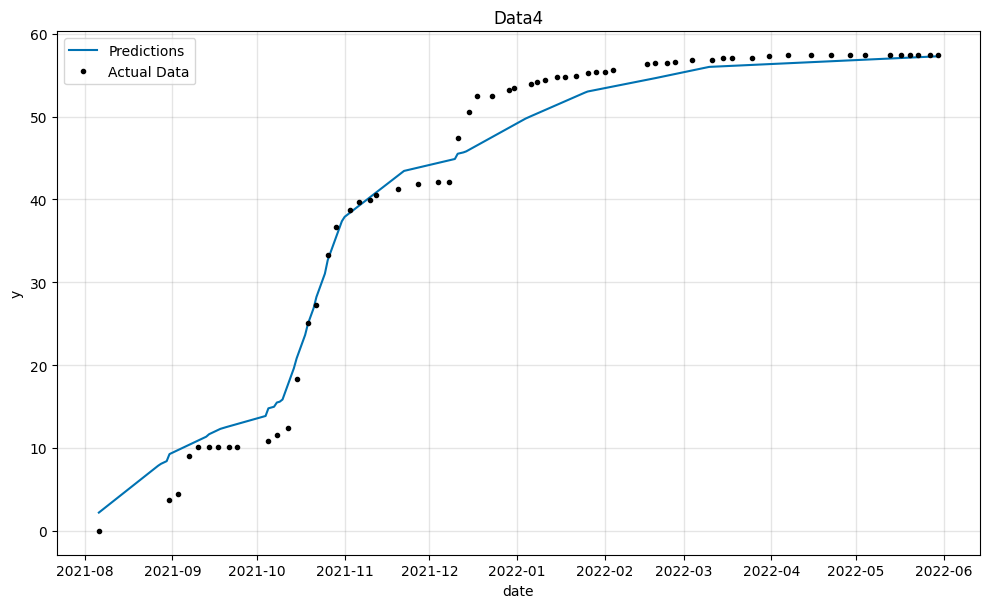

In [35]:
forecast4 = m.predict(df4)
m.plot(forecast4, xlabel='date', plotting_backend='matplotlib')
# m.plot(forecast4, xlabel='4')
plt.title('Data4')
plt.legend(['Predictions','Actual Data'])

pd.set_option('display.max_rows', 10)
forecast4

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 24it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


,ds,y,ID,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.0,data4,2.214457,2.214457,0.00000,0.00000
1,2021-08-07,NaN,data4,2.484008,2.484008,0.00000,0.00000
2,2021-08-08,NaN,data4,2.753559,2.753559,0.00000,0.00000
3,2021-08-09,NaN,data4,3.023110,3.023110,0.00000,0.00000
4,2021-08-10,NaN,data4,3.292661,3.292661,0.00000,0.00000
...,...,...,...,...,...,...,...
303,2022-06-05,NaN,data4,57.377060,52.967201,4.40986,4.40986
304,2022-06-06,NaN,data4,57.392853,52.982994,4.40986,4.40986
305,2022-06-07,NaN,data4,57.408649,52.998787,4.40986,4.40986
306,2022-06-08,NaN,data4,57.424442,53.014580,4.40986,4.40986


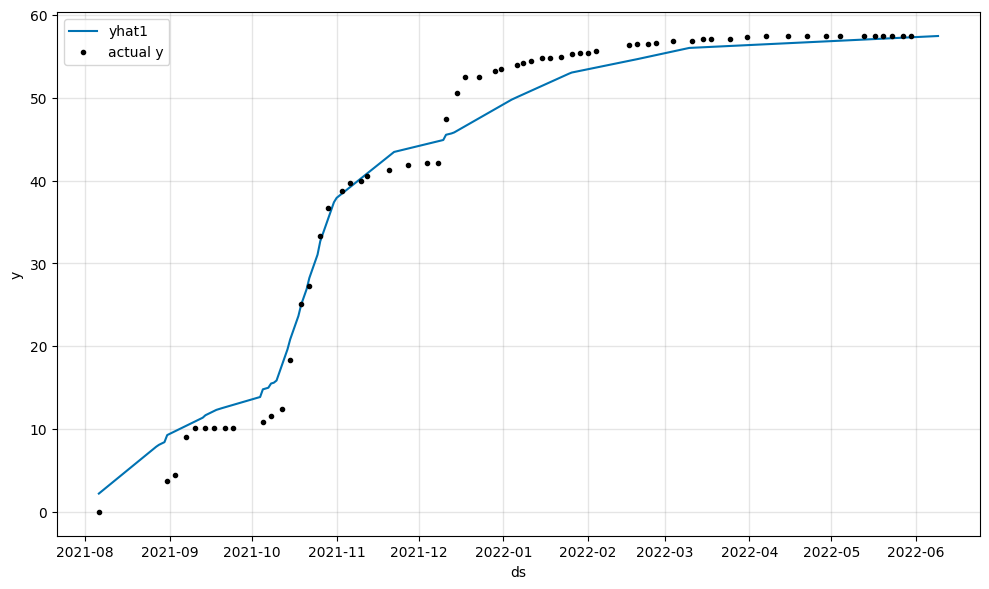

In [36]:
# 미래 10단계 예측

future_regressor = pd.DataFrame({'H':[3.968]*10})

future = m.make_future_dataframe(df4, regressors_df= future_regressor, periods=10, n_historic_predictions=True)
forecast_future = m.predict(future)

m.plot(forecast_future)

pd.set_option('display.max_rows', 10)
forecast_future

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 24it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


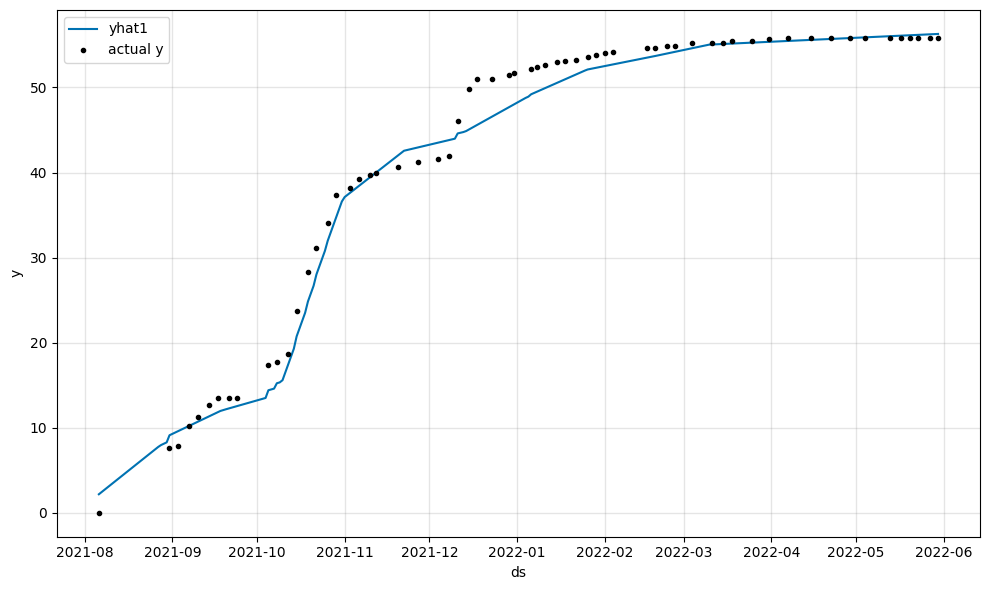

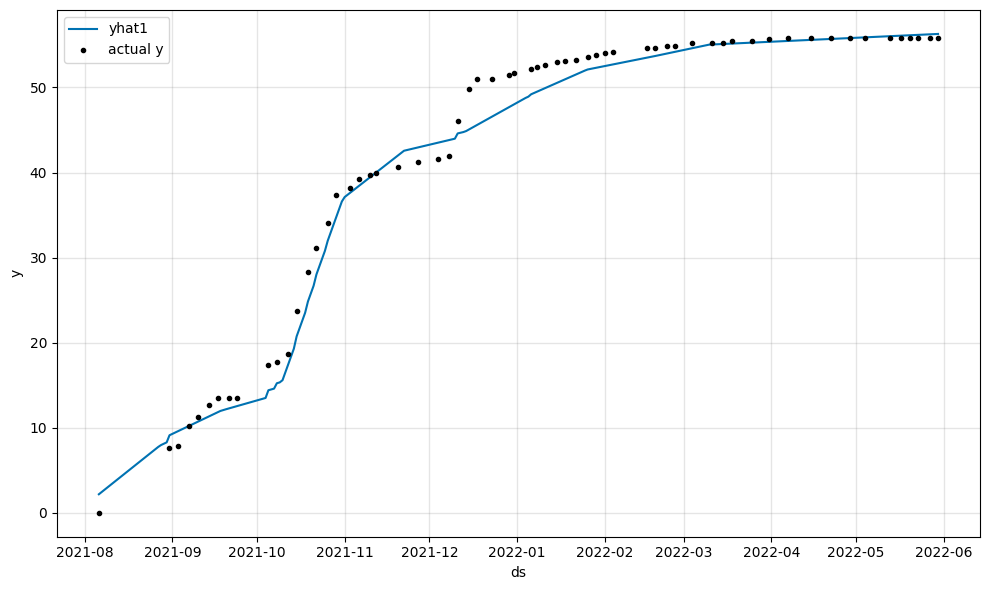

In [37]:
forecast3 = m.predict(df3)
m.plot(forecast3)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 24it [00:00, ?it/s]

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


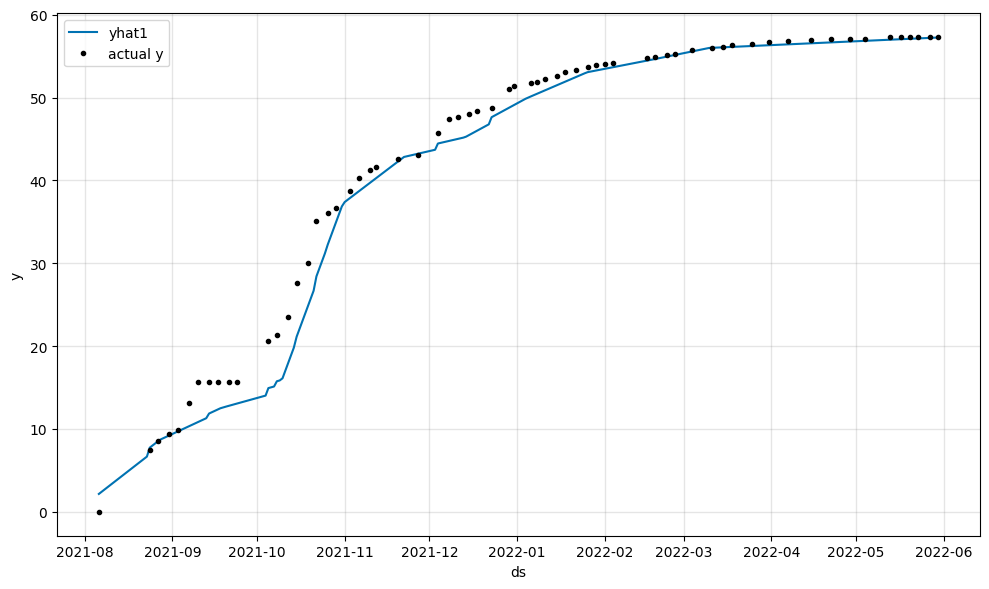

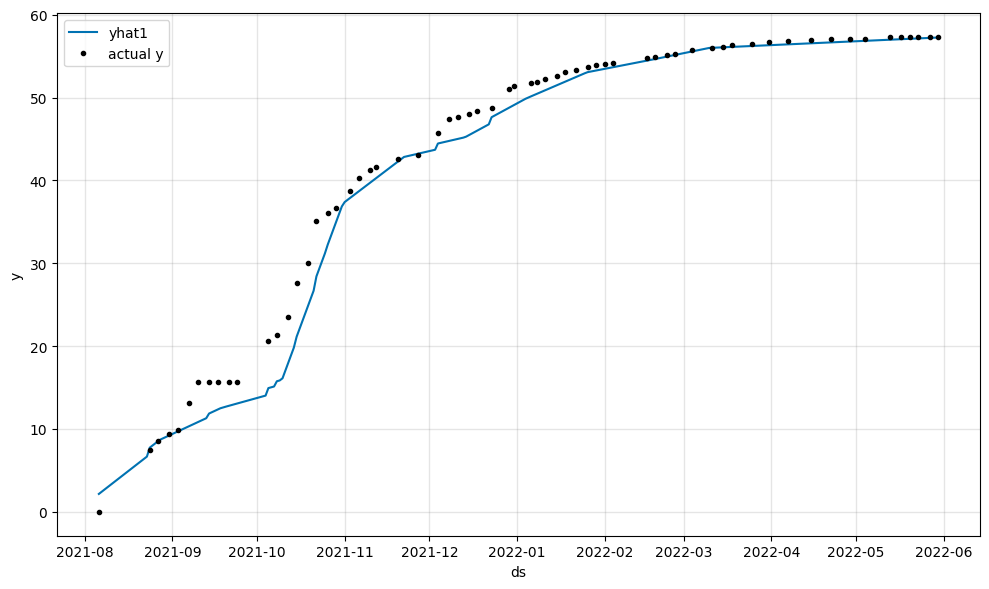

In [38]:
forecast5 = m.predict(df5)
m.plot(forecast5)

In [40]:
def RMSE(result):
    cnt = 0
    SE = 0
    for idx, row in result.dropna().iterrows():
        cnt+=1
        SE+=(row['y']-row['yhat1'])**2
    return (SE/cnt)**(1/2)
        
RMSE(forecast3)
RMSE(forecast5)

2.3658575988249075